In [141]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("planilhas/dfRegressaoDias.csv", sep=';', parse_dates=['Data'], index_col="Data")
display(df)
df.info()

split = int(0.7 * len(df))


X_treino = df[:split].index
X_teste = df[split:].index

Y_treino = df[:split].values
Y_teste = df[split:].values

,CasosDia
Data,
2020-03-15,3
2020-03-16,3
2020-03-17,3
2020-03-18,1
2020-03-19,0
...,...
2023-09-24,0
2023-09-25,13
2023-09-26,14


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293 entries, 2020-03-15 to 2023-09-28
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CasosDia  1293 non-null   int64
dtypes: int64(1)
memory usage: 20.2 KB


# Média Móvel

!! ULTIMO VALOR (20) É A MÉDIA !!!


,PARA,MAE,MSE,RMSE
0,19,12.21,668.2,25.85
1,19,12.21,668.2,25.85
2,19,12.21,668.2,25.85
3,19,12.21,668.2,25.85
4,19,12.21,668.2,25.85
5,19,12.21,668.2,25.85
6,19,12.21,668.2,25.85
7,19,12.21,668.2,25.85
8,19,12.21,668.2,25.85
9,19,12.21,668.2,25.85


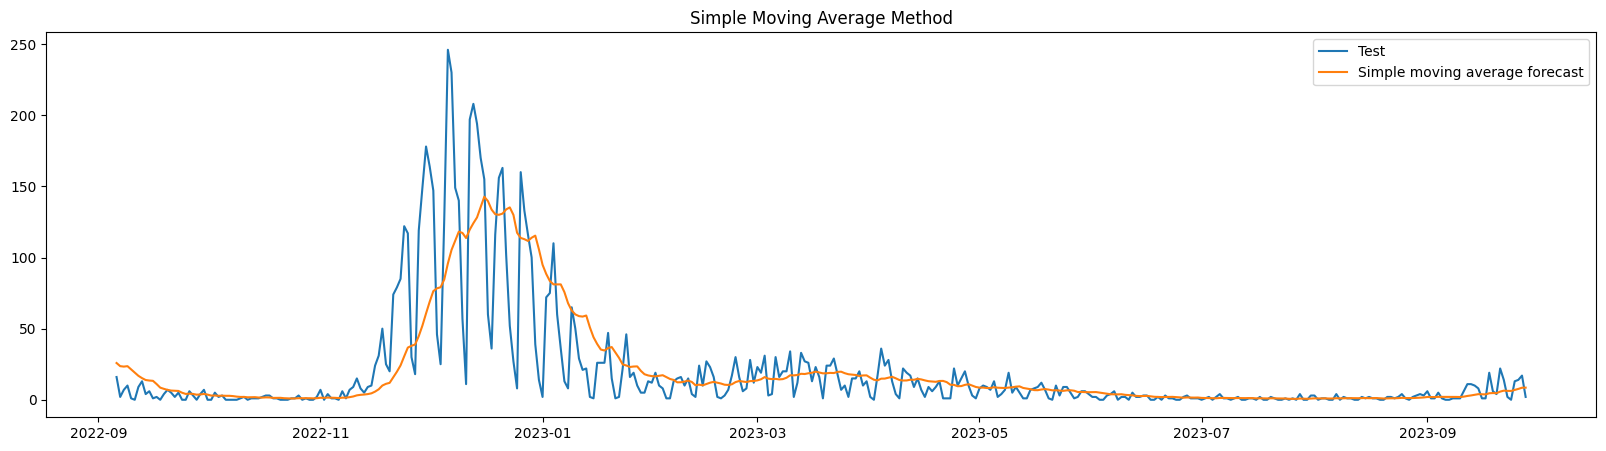

In [142]:
janela = range(1, 20)

train = df[:split]
test = df[split:]

mseMM = []
rmseMM = []
maeMM = []
parametrosMM = []

bestMae = float('inf')


for j in range(20):

    maeCalibra = 0
    auxMae = 0
    ## CALIBRAR
    for i in janela:
        media_movel = df['CasosDia'].rolling(20).mean()

        maeCalibra = mean_squared_error(df[split:], media_movel[split:]).round(2)

        if (maeCalibra < bestMae):
            auxMae = maeCalibra
            para_MM = i



    ## TREINA
    media_movel = df['CasosDia'].rolling(para_MM).mean()

    mae = mean_absolute_error(test['CasosDia'], media_movel[split:]).round(2)
    mse = mean_squared_error(test['CasosDia'], media_movel[split:]).round(2)
    rmse = np.sqrt(mse).round(2)

    mseMM.append(mse)
    rmseMM.append(rmse)
    maeMM.append(mae)
    parametrosMM.append(para_MM)


# RESULTADOSSSS !!!!
    
parametroMaisEscolhidoMM = max(set(parametrosMM), key=parametrosMM.count)
media_maeMM = np.mean(maeMM)
media_mseMM = np.mean(mseMM)
media_rmseMM = np.mean(rmseMM)

parametrosMM.append(parametroMaisEscolhidoMM)
maeMM.append(media_maeMM)
mseMM.append(media_mseMM)
rmseMM.append(media_rmseMM)


dfMediaMovel = pd.DataFrame({
    'PARA': parametrosMM,
    'MAE': maeMM,
    'MSE': mseMM,
    'RMSE': rmseMM
})


print("!! ULTIMO VALOR (20) É A MÉDIA !!!")
display(dfMediaMovel)

dfMediaMovel.to_csv('resultadosModelos/dfMediaMovel.csv', sep = ';', index = False, encoding='UTF-8')




plt.figure(figsize=(20,5))
plt.plot(df[split:], label='Test')
plt.plot(media_movel[split:], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

# SUAVIZAÇÃO EXPONENCIAL - exponential-smoothing

1642.12
1642.12
1556.21
1556.21
1555.31
1555.31
!! ULTIMO VALOR (20) É A MÉDIA !!!


,PARA,MAE,MSE,RMSE
0,0.7,23.24,1556.21,39.45
1,0.7,23.24,1556.21,39.45
2,0.7,23.24,1556.21,39.45
3,0.7,23.24,1556.21,39.45
4,0.7,23.24,1556.21,39.45
5,0.7,23.24,1556.21,39.45
6,0.7,23.24,1556.21,39.45
7,0.7,23.24,1556.21,39.45
8,0.7,23.24,1556.21,39.45
9,0.7,23.24,1556.21,39.45


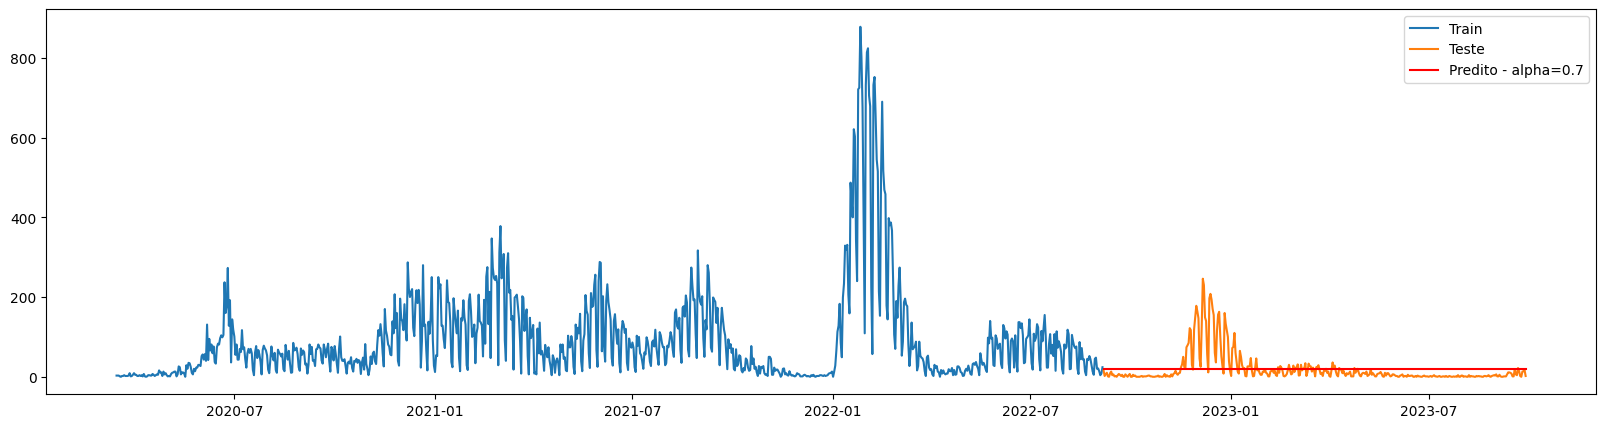

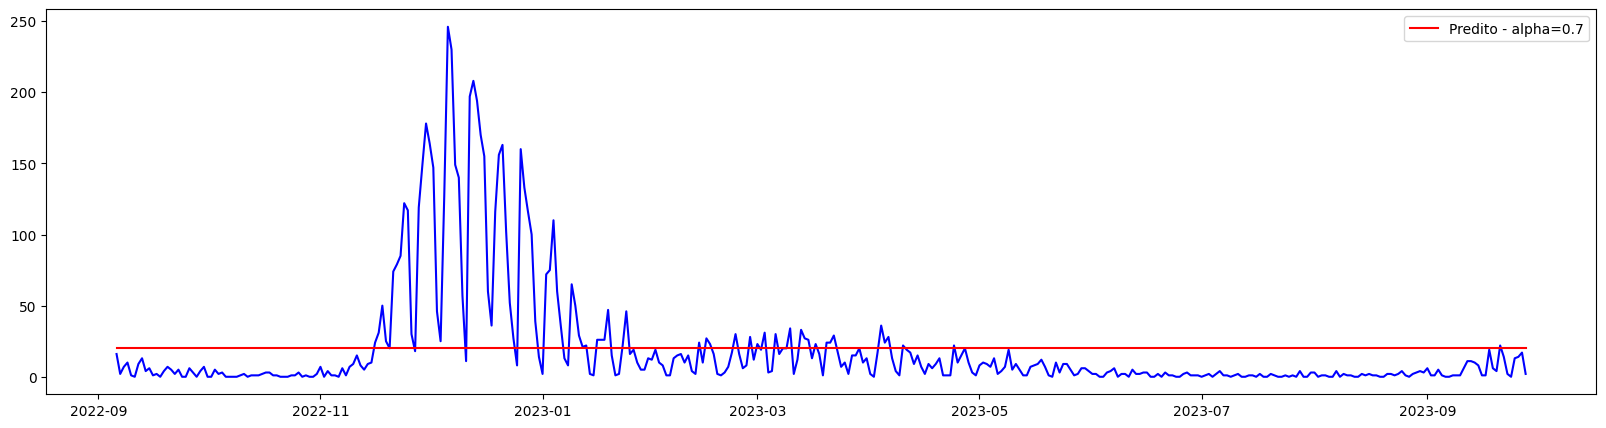

In [143]:



alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9]

mseSE = []
rmseSE = []
maeSE = []
parametrosSE = []
auxMae = 0


for j in range(20):

    maeCalibra = 0

    ## CALIBRAR
    for i in alpha:


        #rint(X_treino)
        #print(Y_treino)

        modelo = ExponentialSmoothing(Y_treino).fit(smoothing_level=i)
        pred = modelo.forecast(len(Y_teste))

        maeCalibra = mean_squared_error(Y_teste, pred).round(2)

        if (maeCalibra < auxMae or auxMae == 0):
            auxMae = maeCalibra
            print(maeCalibra)
            print(auxMae)
            para_SE = i




    ## TREINA
    modelo = ExponentialSmoothing(Y_treino).fit(smoothing_level=0.2)
    pred = modelo.forecast(len(Y_teste))

    mae = mean_absolute_error(Y_teste, pred).round(2)
    mse = mean_squared_error(Y_teste, pred).round(2)
    rmse = np.sqrt(mse).round(2)

    mseSE.append(mse)
    rmseSE.append(rmse)
    maeSE.append(mae)
    parametrosSE.append(para_SE)


# RESULTADOSSSS !!!!
    
parametroMaisEscolhidoSE = max(set(parametrosSE), key=parametrosSE.count)
media_maeSE = np.mean(maeSE)
media_mseSE = np.mean(mseSE)
media_rmseSE = np.mean(rmseSE)

parametrosSE.append(parametroMaisEscolhidoSE)
maeSE.append(media_maeSE)
mseSE.append(media_mseSE)
rmseSE.append(media_rmseSE)


dfSuaviExpo = pd.DataFrame({
    'PARA': parametrosSE,
    'MAE': maeSE,
    'MSE': mseSE,
    'RMSE': rmseSE
})

dfSuaviExpo.to_csv('resultadosModelos/dfSuaviExpo.csv', sep = ';', index = False, encoding='UTF-8')


print("!! ULTIMO VALOR (20) É A MÉDIA !!!")
display(dfSuaviExpo)

plt.figure(figsize=(20,5))
plt.plot(train['CasosDia'], label='Train')
plt.plot(test['CasosDia'], label='Teste')
plt.plot(X_teste, pred, color='red',label=('Predito - alpha=' + str(para_SE)))
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(X_teste, Y_teste, color='blue')
plt.plot(X_teste, pred, color='red',label=('Predito - alpha=' + str(para_SE)))
plt.legend()
plt.savefig('graficos/SuaviExpo.pdf', dpi=300, bbox_inches = "tight")
plt.show()






# ARIMA


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
!! ULTIMO VALOR (20) É A MÉDIA !!!


,p,d,q,MAE,MSE,RMSE
0,2,1,10,18.02,1820.52,42.67
1,2,1,10,18.02,1820.52,42.67
2,2,1,10,18.02,1820.52,42.67
3,2,1,10,18.02,1820.52,42.67
4,2,1,10,18.02,1820.52,42.67
5,2,1,10,18.02,1820.52,42.67
6,2,1,10,18.02,1820.52,42.67
7,2,1,10,18.02,1820.52,42.67
8,2,1,10,18.02,1820.52,42.67
9,2,1,10,18.02,1820.52,42.67


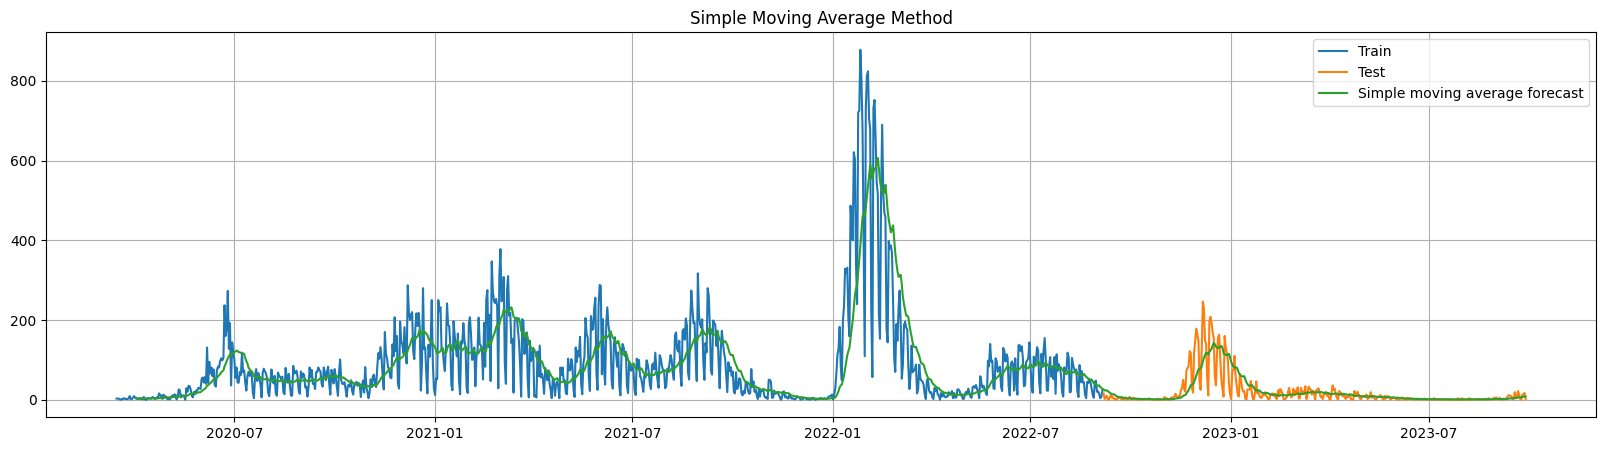

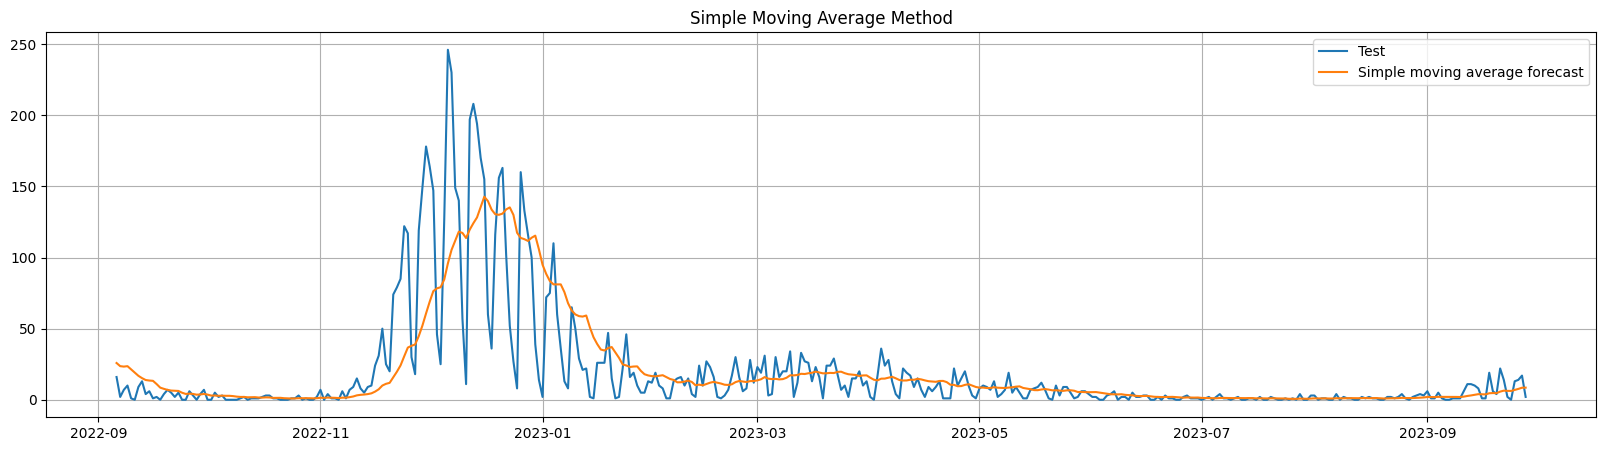

In [145]:


mseARIMA = []
rmseARIMA = []
maeARIMA = []

parametroP_ARIMA = []
parametroD_ARIMA = []
parametroQ_ARIMA = []
auxMae = 0

parametros_grid = {
    'p': [0,1,2,3,4,5],
    'd': [0,1,2,3,4,5],
    'q': [3,4,5,6,7,8,9,10]
   }


for j in range(20):

    maeCalibra = 0
    auxMae = 0
    ## CALIBRAR
    for p in parametros_grid['p']:
      for d in parametros_grid['d']:
        for q in parametros_grid['q']:
            model = ARIMA(train, order=(p,d,q))
            model_fit = model.fit()
            pred = model_fit.forecast(steps=len(Y_teste))


            maeCalibra = mean_absolute_error(Y_teste, pred).round(2)

            if (maeCalibra < auxMae or auxMae == 0):
                auxMae = maeCalibra
                para_p = p
                para_d = d
                para_q = q


    print(j)
    ## TREINA
    model = ARIMA(train, order=(para_p,para_d,para_q))
    model_fit = model.fit()
    pred = model_fit.forecast(steps=len(Y_teste))

    mae = mean_absolute_error(Y_teste, pred).round(2)
    mse = mean_squared_error(Y_teste, pred).round(2)
    rmse = np.sqrt(mse).round(2)

    mseARIMA.append(mse)
    rmseARIMA.append(rmse)
    maeARIMA.append(mae)

    parametroP_ARIMA.append(para_p)
    parametroD_ARIMA.append(para_d)
    parametroQ_ARIMA.append(para_q)


# RESULTADOSSSS !!!!
    
parametroMaisEscolhidoARIMA_p = max(set(parametroP_ARIMA), key=parametroP_ARIMA.count)
parametroMaisEscolhidoARIMA_d = max(set(parametroD_ARIMA), key=parametroD_ARIMA.count)
parametroMaisEscolhidoARIMA_q = max(set(parametroQ_ARIMA), key=parametroQ_ARIMA.count)

media_maeARIMA = np.mean(maeARIMA)
media_mseARIMA = np.mean(mseARIMA)
media_rmseARIMA = np.mean(rmseARIMA)


parametroP_ARIMA.append(parametroMaisEscolhidoARIMA_p)
parametroD_ARIMA.append(parametroMaisEscolhidoARIMA_d)
parametroQ_ARIMA.append(parametroMaisEscolhidoARIMA_q)

maeARIMA.append(media_maeARIMA)
mseARIMA.append(media_mseARIMA)
rmseARIMA.append(media_rmseARIMA)


dfARIMA = pd.DataFrame({
    'p': parametroP_ARIMA,
    'd': parametroD_ARIMA,
    'q': parametroQ_ARIMA,
    'MAE': maeARIMA,
    'MSE': mseARIMA,
    'RMSE': rmseARIMA
})


print("!! ULTIMO VALOR (20) É A MÉDIA !!!")
display(dfARIMA)
dfARIMA.to_csv('resultadosModelos/dfArima.csv', sep = ';', index = False, encoding='UTF-8')



plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['CasosDia'], label='Train')
plt.plot(test['CasosDia'], label='Test')
plt.plot(media_movel, label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(test['CasosDia'], label='Test')
plt.plot(media_movel[split:], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

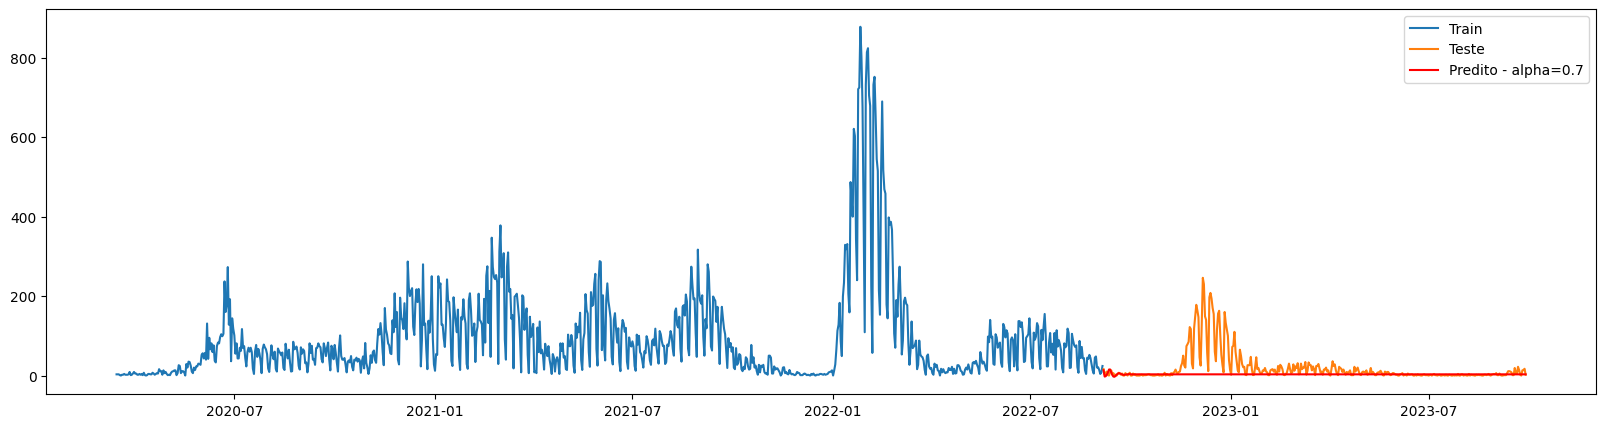

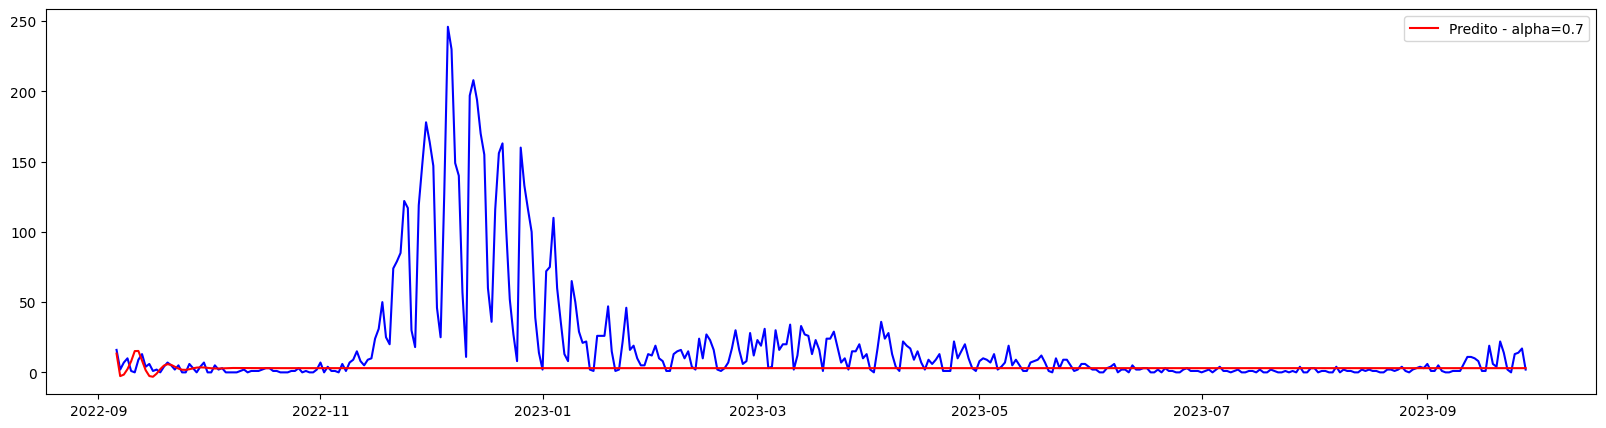

In [148]:

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2,1,10))
model_fit = model.fit()
pred = model_fit.forecast(steps=len(Y_teste))

plt.figure(figsize=(20,5))
plt.plot(train['CasosDia'], label='Train')
plt.plot(test['CasosDia'], label='Teste')
plt.plot(X_teste, pred, color='red',label=('Predito - alpha=' + str(para_SE)))
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(X_teste, Y_teste, color='blue')
plt.plot(X_teste, pred, color='red',label=('Predito - alpha=' + str(para_SE)))
plt.legend()
plt.savefig('graficos/4-ARIMA.pdf', dpi=300, bbox_inches = "tight")
plt.show()


## Para modelos de AM - Casos, chuva soma, umidade e temp media + deslocamento ()